In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from timeit import timeit
from sklearn import datasets, tree

In [188]:
redwine = pd.read_csv('redwine.csv', delimiter=';')
whitewine = pd.read_csv('whitewine.csv', delimiter=';')

In [189]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [151]:
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [152]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [153]:
whitewine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [154]:
redwine = redwine.drop_duplicates()
whitewine = whitewine.drop_duplicates()

In [155]:
#redwine = 0
redwine['wineType'] = 0

#whitewine = 1
whitewine['wineType'] = 1

C:\Users\luish\AppData\Local\Temp\ipykernel_15600\3287337289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redwine['wineType'] = 0
C:\Users\luish\AppData\Local\Temp\ipykernel_15600\3287337289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whitewine['wineType'] = 1


In [156]:
wines_df = [redwine, whitewine]
wines = pd.concat(wines_df).reset_index()
wines = wines.drop(columns='index')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [157]:
wines = wines.drop_duplicates()
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [158]:
# DATA NORMALIZATION
wines_norm = wines.copy()

for column in wines_norm[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                             'total sulfur dioxide','density','pH','sulphates','alcohol']].columns:
    wines_norm[column] = (wines_norm[column] -
                           wines_norm[column].mean()) / wines_norm[column].std()    

wines_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
0,0.140051,2.115150,-2.164312,-0.699634,0.523831,-1.069172,-1.411010,1.100892,1.779136,0.177924,-0.969061,5,0
1,0.443157,3.184998,-2.164312,-0.544084,1.120630,-0.282878,-0.829761,0.763681,-0.153783,0.979297,-0.631774,5,0
2,0.443157,2.471766,-1.892494,-0.610748,0.957867,-0.844517,-1.058738,0.831124,0.220331,0.778954,-0.631774,5,0
3,3.019557,-0.381161,1.641139,-0.699634,0.496704,-0.732189,-0.953056,1.168334,-0.403192,0.311486,-0.631774,6,0
4,0.140051,1.877406,-2.164312,-0.721855,0.496704,-0.956844,-1.305329,1.100892,1.779136,0.177924,-0.969061,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,-0.769267,-0.797213,-0.193632,-0.766298,-0.479877,-0.339042,-0.389420,-1.144931,0.282683,-0.222763,0.548732,6,1
5316,-0.466161,-0.143417,0.282049,0.655868,-0.262859,1.514366,0.949216,0.122981,-0.465544,-0.489887,-0.800417,5,1
5317,-0.541937,-0.618905,-0.873177,-0.855183,-0.425622,-0.002059,-0.054761,-0.672836,-1.463179,-0.489887,-0.969061,6,1
5318,-1.299702,-0.321725,-0.125677,-0.877404,-0.941040,-0.563697,-0.072375,-1.971097,0.719149,-1.024136,1.897880,7,1


In [159]:
#DISCRETIZE QUALITY TO NOT NORMALIZED DATASET

wines_binary = wines.copy()

lst = []

for row in wines.quality:
    if row < wines['quality'].mean():
        lst.append(0)
    else:
        lst.append(1)

#0 = below average
#1 = above average

wines_binary['quality_binary'] = lst

#DISCRETIZE QUALITY TO NORMALIZED DATASET

wines_binary_norm = wines_norm.copy()

lst = []

for row in wines.quality:
    if row < wines['quality'].mean():
        lst.append(0)
    else:
        lst.append(1)

#0 = below average
#1 = above average

wines_binary_norm['quality_binary'] = lst

In [160]:
wines_binary_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType,quality_binary
0,0.140051,2.115150,-2.164312,-0.699634,0.523831,-1.069172,-1.411010,1.100892,1.779136,0.177924,-0.969061,5,0,0
1,0.443157,3.184998,-2.164312,-0.544084,1.120630,-0.282878,-0.829761,0.763681,-0.153783,0.979297,-0.631774,5,0,0
2,0.443157,2.471766,-1.892494,-0.610748,0.957867,-0.844517,-1.058738,0.831124,0.220331,0.778954,-0.631774,5,0,0
3,3.019557,-0.381161,1.641139,-0.699634,0.496704,-0.732189,-0.953056,1.168334,-0.403192,0.311486,-0.631774,6,0,1
4,0.140051,1.877406,-2.164312,-0.721855,0.496704,-0.956844,-1.305329,1.100892,1.779136,0.177924,-0.969061,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,-0.769267,-0.797213,-0.193632,-0.766298,-0.479877,-0.339042,-0.389420,-1.144931,0.282683,-0.222763,0.548732,6,1,1
5316,-0.466161,-0.143417,0.282049,0.655868,-0.262859,1.514366,0.949216,0.122981,-0.465544,-0.489887,-0.800417,5,1,0
5317,-0.541937,-0.618905,-0.873177,-0.855183,-0.425622,-0.002059,-0.054761,-0.672836,-1.463179,-0.489887,-0.969061,6,1,1
5318,-1.299702,-0.321725,-0.125677,-0.877404,-0.941040,-0.563697,-0.072375,-1.971097,0.719149,-1.024136,1.897880,7,1,1


In [161]:
wines_binary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [162]:
wines_binary_norm = wines_binary_norm.drop(columns='quality')
wines_binary = wines_binary.drop(columns='quality')

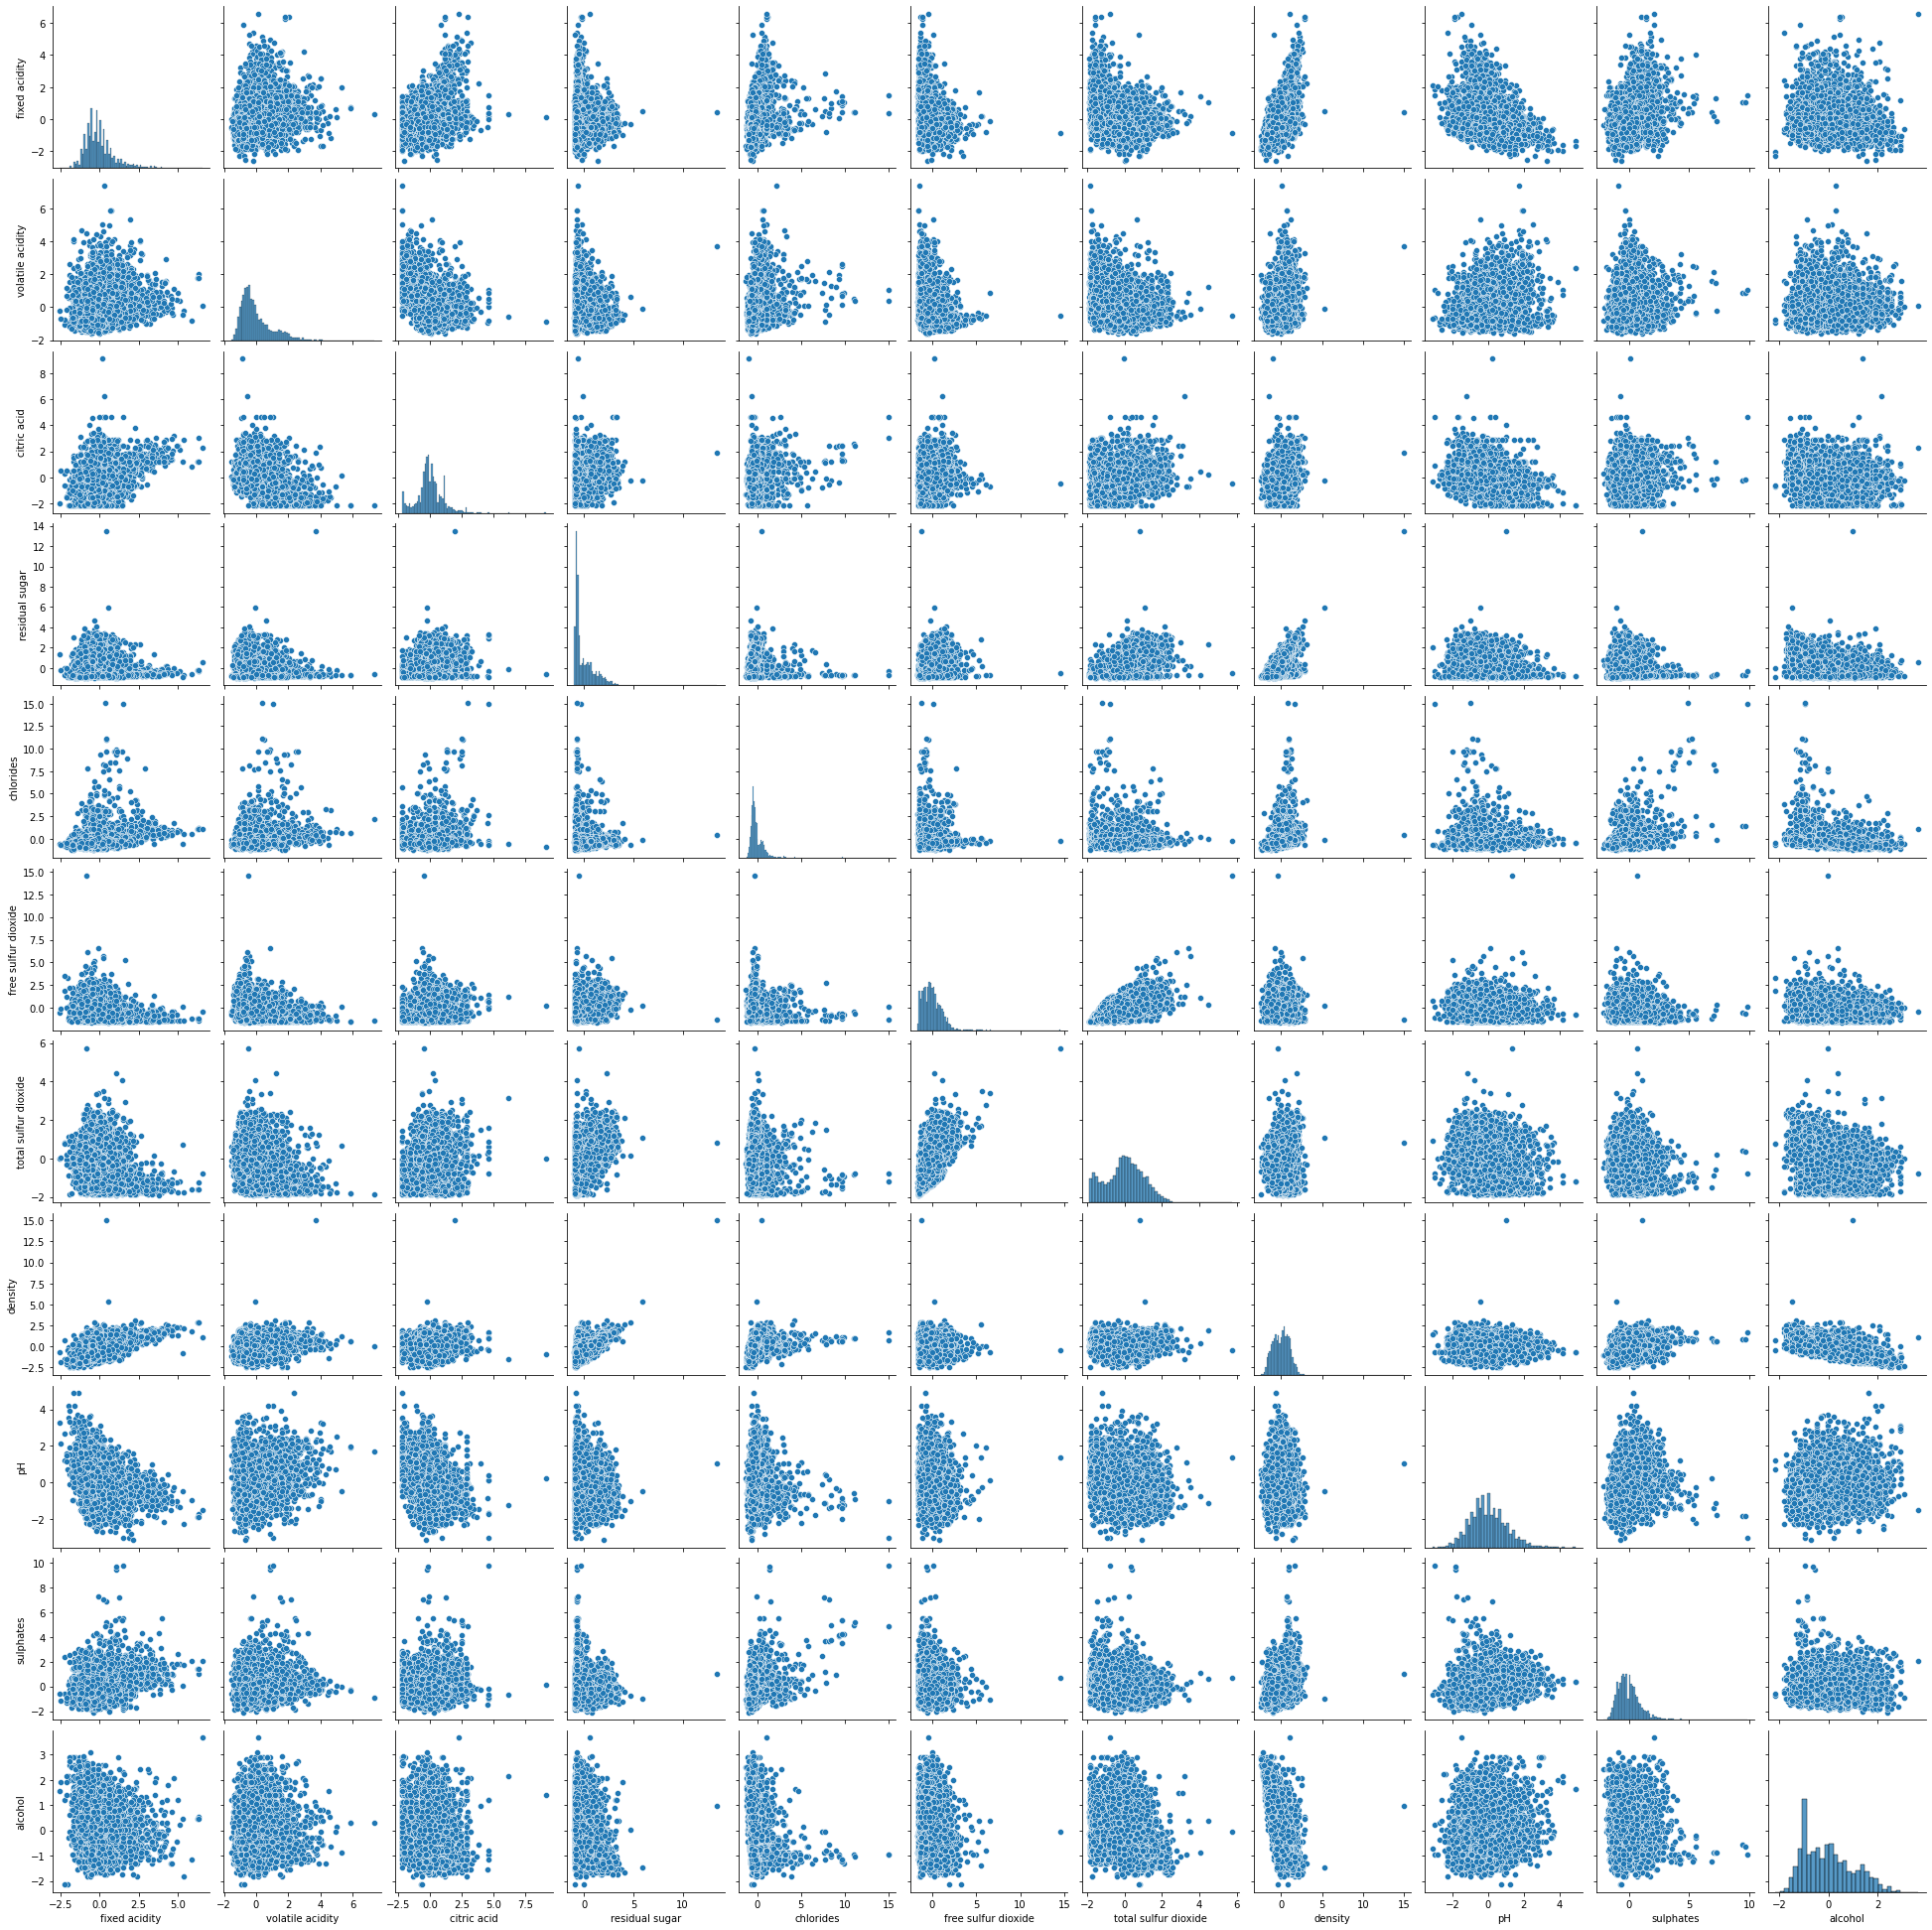

In [164]:
sns.pairplot(wines_binary_norm.drop(columns=['wineType','quality_binary']))

<AxesSubplot:ylabel='fixed acidity'>

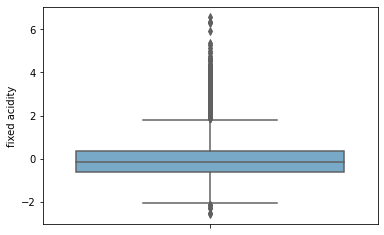

In [165]:
sns.boxplot(y=wines_binary_norm['fixed acidity'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='volatile acidity'>

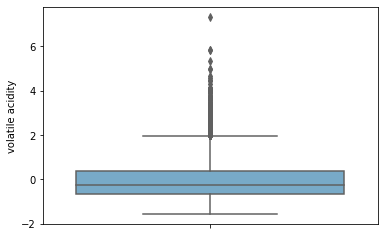

In [166]:
sns.boxplot(y=wines_binary_norm['volatile acidity'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='citric acid'>

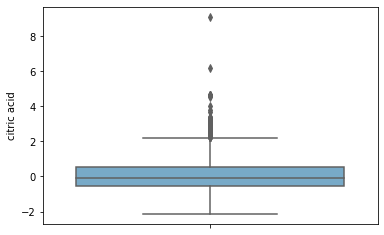

In [167]:
sns.boxplot(y=wines_binary_norm['citric acid'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='residual sugar'>

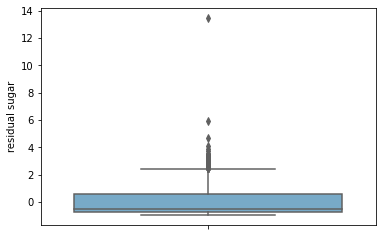

In [168]:
sns.boxplot(y=wines_binary_norm['residual sugar'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='chlorides'>

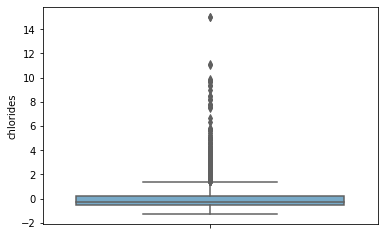

In [169]:
sns.boxplot(y=wines_binary_norm['chlorides'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='free sulfur dioxide'>

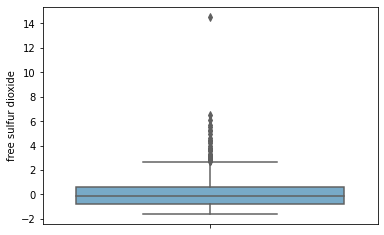

In [170]:
sns.boxplot(y=wines_binary_norm['free sulfur dioxide'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='total sulfur dioxide'>

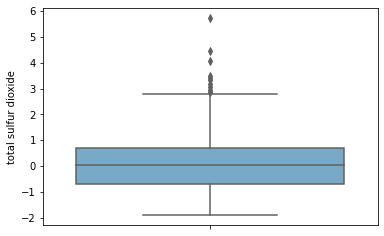

In [171]:
sns.boxplot(y=wines_binary_norm['total sulfur dioxide'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='density'>

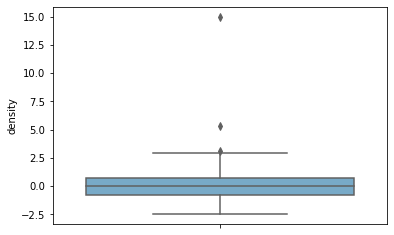

In [172]:
sns.boxplot(y=wines_binary_norm['density'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='pH'>

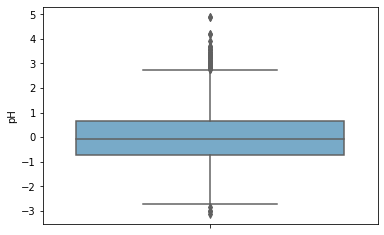

In [173]:
sns.boxplot(y=wines_binary_norm['pH'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='sulphates'>

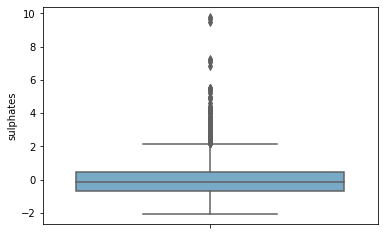

In [174]:
sns.boxplot(y=wines_binary_norm['sulphates'], data=wines_binary_norm, palette = 'Blues')

<AxesSubplot:ylabel='alcohol'>

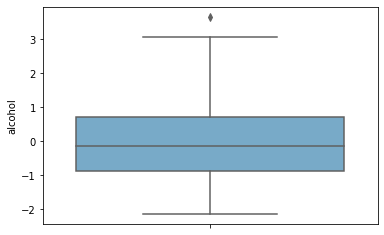

In [175]:
sns.boxplot(y=wines_binary_norm['alcohol'], data=wines_binary_norm, palette = 'Blues')

In [176]:
wines_binary_norm[wines_binary_norm['fixed acidity'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
3,3.019557,-0.381161,1.641139,-0.699634,0.496704,-0.732189,-0.953056,1.168334,-0.403192,0.311486,-0.631774,0,1
174,3.246887,-0.262289,1.912957,-0.677412,0.279686,-1.013008,-1.534306,1.202055,-0.714953,2.915950,-0.378808,0,1
182,4.231981,-0.262289,2.864320,-0.544084,1.039249,-1.181500,-1.516692,1.640429,-0.153783,1.580327,0.211444,0,1
188,3.322663,0.569815,2.184775,-0.655191,0.062668,-1.406155,-1.745669,1.168334,-0.091430,0.912516,-0.294486,0,1
212,3.625769,0.213199,1.641139,-0.655191,0.984994,-1.349991,-1.587147,1.589848,-0.527896,1.179641,0.295766,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,3.322663,0.777840,0.553867,-0.810740,0.930740,-1.349991,-1.516692,0.844612,-0.964362,0.778954,-0.435023,0,1
1233,3.398440,0.629250,2.116820,-0.632970,0.442449,-1.293827,-1.604760,1.755081,-0.091430,1.046078,0.295766,0,1
1316,3.019557,0.332071,1.233412,-0.677412,1.147758,-0.619861,-1.129192,1.111008,-0.777305,0.311486,-0.125843,0,0
2648,5.292852,-0.440597,1.165458,-0.877404,-0.534131,0.166433,0.737852,-0.854930,-0.465544,0.044362,0.464410,1,1


In [177]:
wines_binary_norm[wines_binary_norm['volatile acidity'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
1,0.443157,3.184998,-2.164312,-0.544084,1.120630,-0.282878,-0.829761,0.763681,-0.153783,0.979297,-0.631774,0,0
35,-1.148149,4.670897,-1.552722,-0.788519,3.128046,-1.293827,-1.675215,-0.180509,1.716784,-0.356325,-0.631774,0,0
42,0.367381,3.511895,0.757731,-0.632970,1.554666,-0.451369,-0.001920,0.831124,0.157979,1.313203,-1.137704,0,0
86,-1.678584,4.017101,-1.892494,-0.810740,-0.317113,0.615744,-0.512715,-0.247951,3.275590,-0.356325,-0.041521,0,0
90,0.291604,3.303870,-1.756585,-0.566306,0.605213,-1.406155,-1.833738,0.729960,1.030910,0.177924,-0.631774,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2.110240,3.363306,0.689776,-0.766298,-0.018714,0.222597,1.178193,0.763681,-0.714953,-0.489887,-0.463130,1,0
2997,2.034463,3.927947,0.961594,-0.810740,-0.289986,0.222597,1.248647,0.696239,-1.276123,-0.289544,-0.294486,1,0
3152,1.958687,3.482177,0.893640,0.789196,-0.127223,0.222597,1.283875,1.640429,-0.652600,0.378267,-0.294486,1,0
3653,0.443157,3.690203,1.912957,13.499798,0.469577,-1.237664,0.808307,14.987228,1.030910,1.046078,0.970341,1,1


In [178]:
wines_binary_norm[wines_binary_norm['citric acid'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
135,1.504028,1.045302,4.631136,-0.366314,15.009777,0.110269,-0.794534,1.707871,-3.021985,9.794405,-0.969061,0,0
226,0.367381,0.391507,3.000229,-0.721855,15.036905,-1.237664,-1.217261,0.763681,-1.026714,4.852602,-0.969061,0,0
308,4.762417,1.104738,3.204092,-0.055215,1.717430,-0.395206,-0.653624,2.449735,-0.278487,1.580327,2.066524,0,0
345,3.625769,0.153763,3.000229,-0.188543,0.252559,-1.293827,-1.340556,1.977640,-0.029078,0.445048,2.066524,0,1
385,6.353723,2.025996,3.000229,-0.299650,1.174885,-1.349991,-1.252488,2.921830,-1.712588,0.979297,0.548732,0,1
1336,-1.223925,-0.202853,3.136138,1.966926,0.469577,-0.395206,-0.389420,0.753565,1.030910,-0.356325,-0.041521,0,1
1536,2.261793,0.569815,3.815682,0.255884,-0.208604,-0.563697,0.174216,0.763681,-1.463179,-0.155982,-0.547452,1,0
1987,0.140051,-0.856649,9.116132,-0.655191,-0.941040,0.222597,-0.019534,-0.972954,0.220331,0.111143,1.391950,1,1
2154,0.746263,0.005173,4.631136,2.922444,-0.262859,1.402038,1.600920,1.724732,-1.650236,-0.690231,-0.800417,1,0
2247,-0.238831,-0.797213,3.340001,-0.877404,2.178593,1.233546,0.156602,-0.450277,-1.213770,-0.957355,-1.137704,1,1


In [179]:
wines_binary_norm[wines_binary_norm['residual sugar'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
1359,-0.163055,-0.440597,0.282049,3.477977,-0.317113,0.840399,0.984443,2.179966,-1.400827,-0.556668,-1.474992,1,1
1369,0.822040,0.450943,2.048866,3.155768,-0.452750,0.615744,1.019670,1.910198,-1.525532,0.912516,-0.716095,1,0
1447,0.215828,-0.232571,0.553867,3.077993,0.062668,0.784235,0.984443,1.842756,-1.463179,-0.489887,-1.306348,1,0
1452,-0.011502,-0.440597,0.961594,3.044661,-0.127223,0.840399,2.481601,1.842756,-1.151418,-0.089200,-1.390670,1,0
1514,-0.314608,-0.381161,0.553867,3.766854,-0.235732,1.008891,0.931602,2.179966,-1.837293,-0.222763,-1.559314,1,0
1579,-0.238831,-0.321725,0.553867,3.200210,-0.371368,0.334925,0.737852,1.707871,-1.837293,-0.423106,-1.390670,1,0
1605,0.140051,-0.381161,0.689776,3.277985,0.252559,1.289710,1.424784,1.842756,-1.650236,-0.623449,-1.222026,1,0
1703,-0.011502,-0.559469,0.485913,3.089104,-0.507004,0.671908,0.720238,1.809035,-1.587884,-0.423106,-1.306348,1,1
1728,-0.238831,-0.618905,0.282049,3.500198,-0.696895,0.559580,0.438420,0.999729,-0.153783,-1.358042,0.380088,1,1
1963,-0.163055,-0.440597,0.621822,3.044661,-0.398495,0.222597,0.755466,1.910198,-1.650236,-0.222763,-1.222026,1,0


In [180]:
wines_binary_norm[wines_binary_norm['chlorides'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
12,1.276698,1.639662,-0.941131,-0.277428,3.236555,1.233546,0.544102,1.370661,-0.403192,2.314920,-1.137704,0,0
13,1.276698,1.639662,-0.873177,-0.255207,3.073792,1.177382,0.596943,1.370661,-0.340839,2.648825,-1.137704,0,0
15,0.670487,1.283046,-0.261586,-0.744076,8.444985,-0.788353,-1.023511,0.763681,-0.714953,4.986164,-1.053383,0,0
17,0.518934,-0.143417,1.301367,-0.721855,7.712550,-0.732189,-1.023511,0.797402,-1.151418,3.650542,-1.137704,0,1
35,-1.148149,4.670897,-1.552722,-0.788519,3.128046,-1.293827,-1.675215,-0.180509,1.716784,-0.356325,-0.631774,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,-0.087278,0.094327,-0.805222,-0.766298,5.813643,-0.339042,0.456034,-0.328881,-0.714953,0.645392,-0.631774,1,0
4973,-0.693490,-0.321725,-0.125677,0.678089,4.213136,1.682857,0.632170,0.426471,-0.777305,-0.890574,-1.053383,1,0
5147,-0.163055,-0.440597,2.864320,-0.832962,3.155173,0.222597,0.121375,-0.403068,-1.151418,-0.489887,-1.137704,1,1
5225,-0.920820,-0.202853,0.010231,0.522540,3.209428,0.952727,0.790693,0.224144,-0.216135,-0.222763,-0.969061,1,1


In [181]:
wines_binary_norm[wines_binary_norm['free sulfur dioxide'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
1634,0.215828,-0.440597,-0.057723,0.166998,0.008414,5.670491,3.503192,0.021818,-0.278487,0.378267,-0.041521,1,0
1692,-0.314608,-0.440597,-1.348858,-0.832962,-0.452750,3.199281,0.949216,-0.854930,-0.278487,-0.823793,-0.463130,1,0
1910,-0.314608,-0.321725,-1.077040,-0.810740,-0.507004,5.193098,2.120522,-0.787488,-0.465544,-0.423106,-0.463130,1,0
2422,-0.617714,-1.034957,-0.329541,0.366990,-0.561259,3.255445,1.917965,0.089260,0.345035,-1.224479,-0.294486,1,1
2783,-0.390384,-0.559469,-0.397495,-0.777408,-0.425622,4.968443,1.794670,0.122981,2.028545,0.645392,-0.969061,1,0
2909,0.746263,-0.975521,-0.057723,1.500278,-0.479877,3.704756,2.375919,1.033450,-0.964362,-0.089200,-0.884739,1,1
2981,-0.087278,0.866994,-0.669313,-0.677412,-0.262859,6.541031,3.406317,-0.720046,0.095626,-1.090917,0.380088,1,0
3292,0.215828,-0.678341,0.214095,2.833558,0.035541,5.501999,1.724215,2.655433,1.342671,-0.690231,-1.390670,1,0
3294,-0.314608,-0.500033,-0.669313,-0.055215,-0.425622,4.491050,1.477624,-0.055741,0.407387,0.912516,0.042801,1,0
3494,-0.390384,-1.034957,0.689776,1.189180,-0.507004,3.086954,1.195806,0.588332,-1.151418,-0.623449,-1.390670,1,1


In [182]:
wines_binary_norm[wines_binary_norm['total sulfur dioxide'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
920,0.518934,-0.262289,2.456593,0.722532,-0.181477,0.419170,3.080464,-0.463765,-1.338475,-0.155982,1.476271,0,1
1634,0.215828,-0.440597,-0.057723,0.166998,0.008414,5.670491,3.503192,0.021818,-0.278487,0.378267,-0.041521,1,0
2558,1.049369,1.223610,0.214095,2.333578,0.008414,0.306843,4.445521,1.876477,-1.151418,0.645392,0.380088,1,0
2981,-0.087278,0.866994,-0.669313,-0.677412,-0.262859,6.541031,3.406317,-0.720046,0.095626,-1.090917,0.380088,1,0
3130,1.428251,-0.083981,0.417958,-0.744076,0.144050,1.149300,4.049214,0.426471,-0.777305,1.112860,-0.884739,1,0
3553,-0.238831,0.332071,-0.669313,0.200330,0.659467,2.581479,3.327055,0.847984,1.093262,0.244705,-0.969061,1,0
3944,0.291604,-0.559469,6.194089,-0.099658,-0.588386,1.177382,3.168533,-1.468653,-1.213770,-0.690231,2.150846,1,1
5186,-0.845043,-0.500033,-0.465450,-0.477420,-0.262859,14.544381,5.740122,-0.470510,1.342671,0.712173,-0.041521,1,0


In [183]:
wines_binary_norm[wines_binary_norm['density'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
1216,2.261793,1.164174,0.350004,2.300246,4.267390,1.402038,-0.336579,3.087063,-0.278487,1.580327,-1.306348,0,1
2753,0.518934,-0.083981,-0.261586,5.900102,-0.100095,0.278761,1.090125,5.316026,-0.465544,-1.024136,-1.474992,1,1
3653,0.443157,3.690203,1.912957,13.499798,0.469577,-1.237664,0.808307,14.987228,1.030910,1.046078,0.970341,1,1


In [184]:
wines_binary_norm[wines_binary_norm['pH'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
41,-1.981690,1.045302,-1.144995,-0.655191,-0.072968,-1.237664,-0.864988,-0.382835,4.210873,0.177924,2.150846,0,0
86,-1.678584,4.017101,-1.892494,-0.810740,-0.317113,0.615744,-0.512715,-0.247951,3.275590,-0.356325,-0.041521,0,0
87,-1.905914,1.520790,-1.009086,-0.610748,0.035541,-0.732189,-0.142829,-0.450277,3.899112,0.445048,1.982202,0,1
482,-1.678584,4.135973,-0.533404,-0.766298,-0.181477,0.110269,-0.318966,-0.382835,3.213237,0.578611,0.801697,0,0
510,-1.678584,0.450943,-0.533404,-0.677412,0.089795,-0.619861,-1.129192,-0.956093,3.088533,1.379984,2.909742,0,1
602,-1.602808,0.748122,-2.028403,-0.832962,-0.615513,-0.676025,-1.234874,-0.821209,4.210873,0.578611,1.897880,0,1
710,-1.754361,0.450943,-2.164312,-0.655191,-0.235732,-0.788353,-1.270101,-1.010047,3.026181,1.379984,2.909742,0,1
848,-1.223925,1.877406,-2.164312,-0.632970,0.822231,-1.518483,-1.816124,-0.254695,3.026181,0.645392,1.897880,0,1
945,-1.375478,0.450943,-0.329541,-0.677412,0.957867,-0.395206,-1.041124,0.058911,3.462646,0.712173,1.476271,0,1
1107,-1.527031,1.788252,-2.164312,-0.644080,0.632340,-0.844517,-1.516692,-0.032136,3.462646,0.511830,1.644915,0,1


In [185]:
wines_binary_norm[wines_binary_norm['sulphates'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
11,0.443157,1.580226,-0.193632,-0.766298,1.554666,-1.181500,-1.499079,0.966008,0.220331,6.856036,-1.222026,0,0
15,0.670487,1.283046,-0.261586,-0.744076,8.444985,-0.788353,-1.023511,0.763681,-0.714953,4.986164,-1.053383,0,0
17,0.518934,-0.143417,1.301367,-0.721855,7.712550,-0.732189,-1.023511,0.797402,-1.151418,3.650542,-1.137704,0,1
39,0.670487,1.877406,-0.669313,-0.632970,0.333940,-1.181500,-1.604760,0.763681,0.469740,4.451915,-0.210165,0,0
73,0.822040,1.669380,-0.805222,-0.788519,0.632340,-0.170550,0.086148,0.898566,-0.403192,3.917667,-1.222026,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,-0.011502,-0.856649,-0.261586,-0.766298,-0.778276,-0.956844,0.949216,-0.844814,-0.340839,3.516980,0.801697,1,1
3567,1.807134,1.847688,-0.737268,-0.677412,-0.479877,-0.507533,0.103761,-0.895395,-1.400827,3.116293,1.729237,1,1
3727,-1.375478,-0.678341,0.282049,-0.788519,-0.724022,2.469151,0.121375,-1.610282,0.095626,3.049512,1.307628,1,1
5048,-0.693490,0.153763,1.301367,0.278105,-0.235732,0.278761,0.561716,-0.079345,-0.777305,3.183074,-0.041521,1,1


In [186]:
wines_binary_norm[wines_binary_norm['alcohol'] > 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType,quality_binary
565,6.581052,0.094327,2.252729,0.544761,1.066376,-0.451369,-0.759306,1.033450,-1.525532,2.047795,3.668638,0,0
4530,-0.617714,0.034891,-0.261586,-0.766298,-0.534131,0.054105,-0.019534,-2.274587,-0.652600,-0.890574,3.078386,1,1
